In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import datetime as dt
data = pd.read_csv('Uber.csv')

1. what are the different variables that influence pickups? 
2. Which factor affects the pickups the most? What could be plausible reasons for that? 
3. What are your recommendations to Uber management to capitalize on fluctuating demand? 

In [53]:
df = data.copy()
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [54]:
df.sample(10)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
10497,2015-03-07 21:00:00,Manhattan,3998,3.0,10.000000,37.0,16.000000,1018.5,0.00,0.140833,0.5600,18.333333,N
16217,2015-04-12 18:00:00,NaN,2,8.0,10.000000,62.0,24.000000,1025.5,0.00,0.000000,0.0000,0.000000,N
19245,2015-05-01 15:00:00,Brooklyn,498,9.0,10.000000,55.0,38.000000,1015.6,0.00,0.000000,0.0000,0.000000,N
21796,2015-05-17 07:00:00,Queens,198,0.0,2.033333,66.0,63.666667,1019.6,0.01,0.000000,0.0000,0.000000,N
8982,2015-02-26 12:00:00,EWR,0,8.0,10.000000,22.0,3.000000,1016.1,0.00,0.000000,0.0000,11.708333,N
5938,2015-02-07 12:00:00,Staten Island,1,3.0,10.000000,28.0,11.000000,1020.9,0.00,0.000000,0.0000,8.000000,N
11681,2015-03-15 06:00:00,Staten Island,0,7.0,10.000000,44.0,40.000000,1006.0,0.00,0.090000,0.3875,0.958333,N
20579,2015-05-09 20:00:00,Bronx,88,6.0,7.000000,69.0,57.000000,1024.4,0.00,0.000000,0.0000,0.000000,N
11243,2015-03-12 13:00:00,Manhattan,1839,9.0,10.000000,41.0,12.000000,1027.9,0.00,0.000000,0.0000,5.333333,N
18416,2015-04-26 10:00:00,Queens,277,7.0,10.000000,47.0,27.000000,1005.3,0.00,0.000000,0.0000,0.000000,N


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [56]:
df.describe().T # only numerical variables 

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,29101.0,47.669042,19.814969,2.0,32.0,46.0,64.500000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


In [57]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pickup_dt,29101,4343,2015-06-30 23:00:00,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
borough,26058,6,Bronx,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickups,29101.0,NaN,NaN,NaN,490.215903,995.649536,0.0,1.0,54.0,449.0,7883.0
spd,29101.0,NaN,NaN,NaN,5.984924,3.699007,0.0,3.0,6.0,8.0,21.0
vsb,29101.0,NaN,NaN,NaN,8.818125,2.442897,0.0,9.1,10.0,10.0,10.0
temp,29101.0,NaN,NaN,NaN,47.669042,19.814969,2.0,32.0,46.0,64.5,89.0
dewp,29101.0,NaN,NaN,NaN,30.823065,21.283444,-16.0,14.0,30.0,50.0,73.0
slp,29101.0,NaN,NaN,NaN,1017.817938,7.768796,991.4,1012.5,1018.2,1022.9,1043.4
pcp01,29101.0,NaN,NaN,NaN,0.00383,0.018933,0.0,0.0,0.0,0.0,0.28
pcp06,29101.0,NaN,NaN,NaN,0.026129,0.093125,0.0,0.0,0.0,0.0,1.24


In [58]:
# multi - modal data 
cat_col = ['borough', 'hday']
for col in cat_col:
    print(df[col].value_counts())
    print('-' * 50) 

borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: count, dtype: int64
--------------------------------------------------
hday
N    27980
Y     1121
Name: count, dtype: int64
--------------------------------------------------


In [59]:
df.pickup_dt = pd.to_datetime(df.pickup_dt)
df['year'] = df.pickup_dt.dt.year 
df['month'] = df.pickup_dt.dt.month 
df['hour'] = df.pickup_dt.dt.hour 
df['day'] = df.pickup_dt.dt.day 
df['minute'] = df.pickup_dt.dt.minute
df['week_day'] = df.pickup_dt.dt.day_name()

In [60]:
df.drop('pickup_dt', axis=1, inplace=True)

In [61]:
df.isna().sum()

borough     3043
pickups        0
spd            0
vsb            0
temp           0
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
year           0
month          0
hour           0
day            0
minute         0
week_day       0
dtype: int64

In [62]:
df['borough'].fillna('unknown', inplace=True)
df.borough.value_counts(normalize=True, dropna=False)

C:\Users\jesse\AppData\Local\Temp\ipykernel_852\3681431302.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['borough'].fillna('unknown', inplace=True)


borough
Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
unknown          0.104567
Name: proportion, dtype: float64

# Univariant

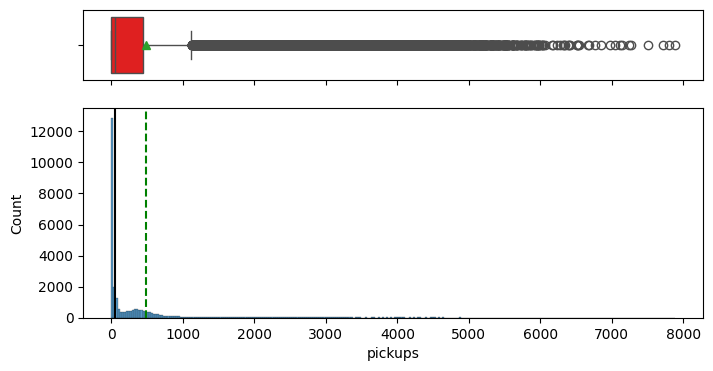

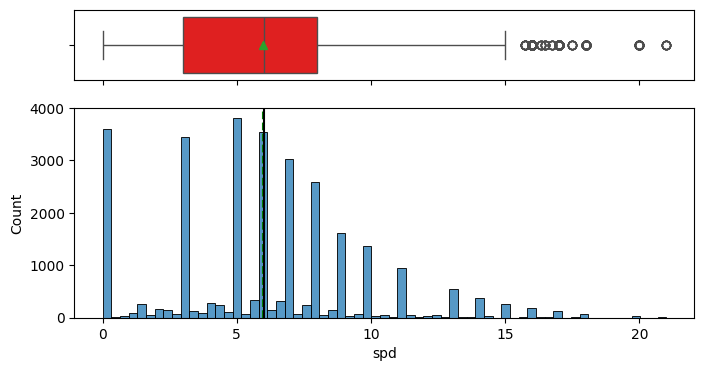

In [63]:
def histogram_boxplot(feature, figsize=(8, 4), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()
for col in ['pickups', 'spd']:
    histogram_boxplot(df[col])

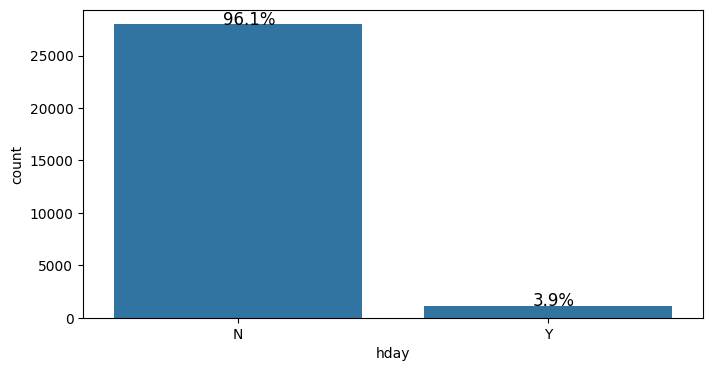

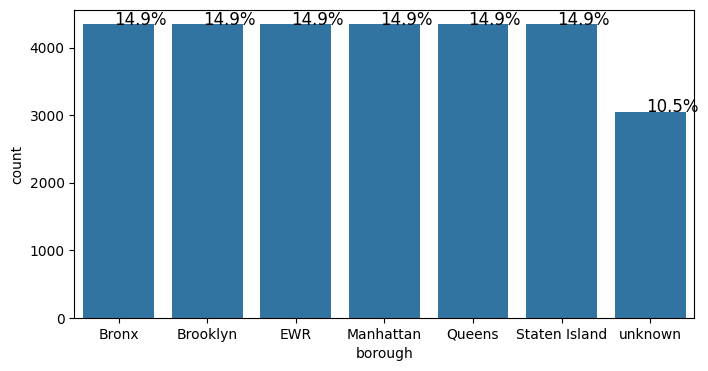

In [64]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (8, 4))
    
    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')
    
    ax = sns.countplot(x=z, data=data, order=data[z].value_counts().index)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()     

for col in ['hday', 'borough']:
    bar_perc(df, col)

<Axes: >

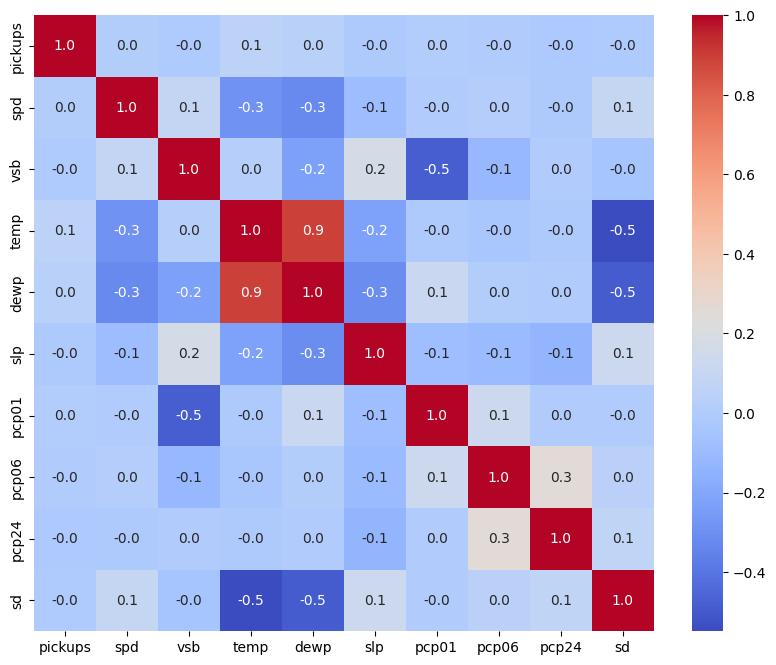

In [65]:
num_var = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',            
        fmt = ".1f",            
        xticklabels = corr.columns,            
        yticklabels = corr.columns)
# best when dependent variables are correlated with indepenent variable, but not correlated with each other

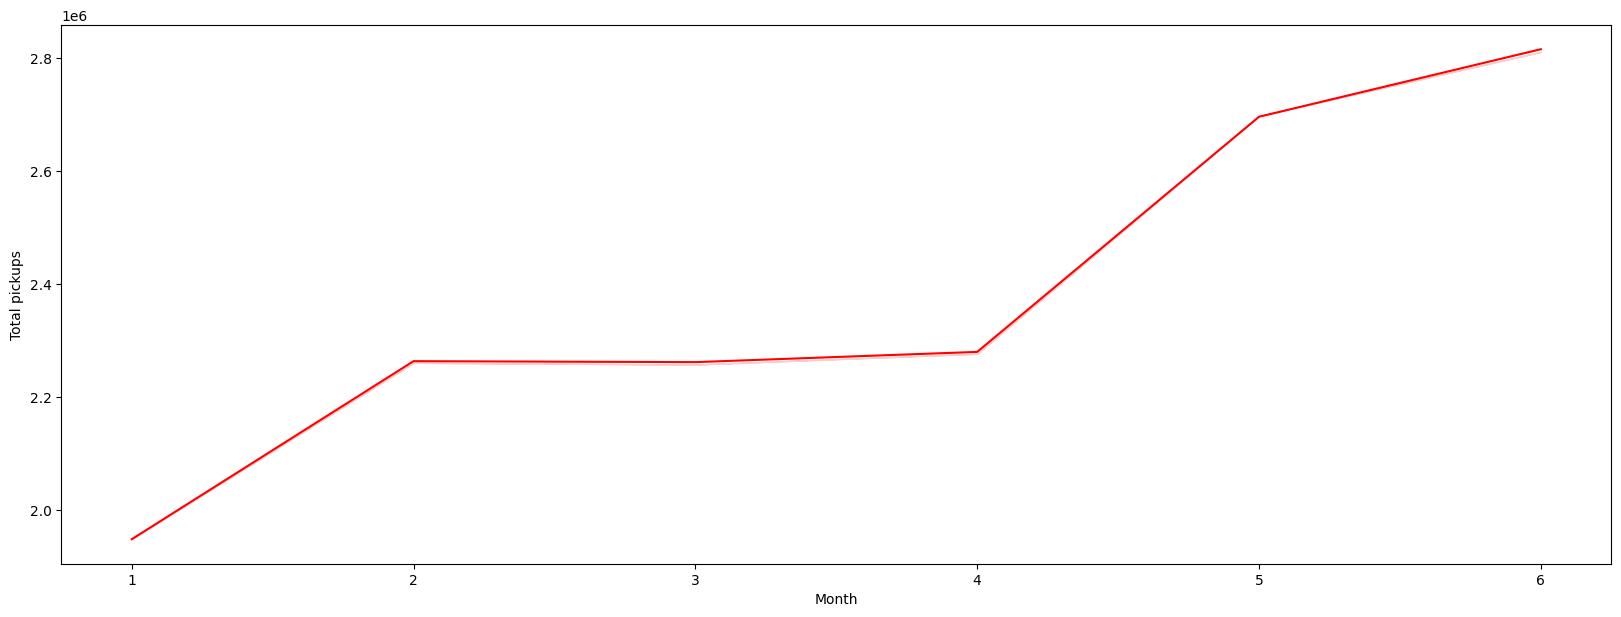

In [66]:
cats = df.month.unique().tolist()
df.month = pd.Categorical(df.month, ordered = True, categories = cats)
plt.figure(figsize = (20, 7))
sns.lineplot(x = "month", y = "pickups", data = df, errorbar=('ci', 0), color = "RED", estimator = 'sum')
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()

In [67]:
df.columns

Index(['borough', 'pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01',
       'pcp06', 'pcp24', 'sd', 'hday', 'year', 'month', 'hour', 'day',
       'minute', 'week_day'],
      dtype='object')

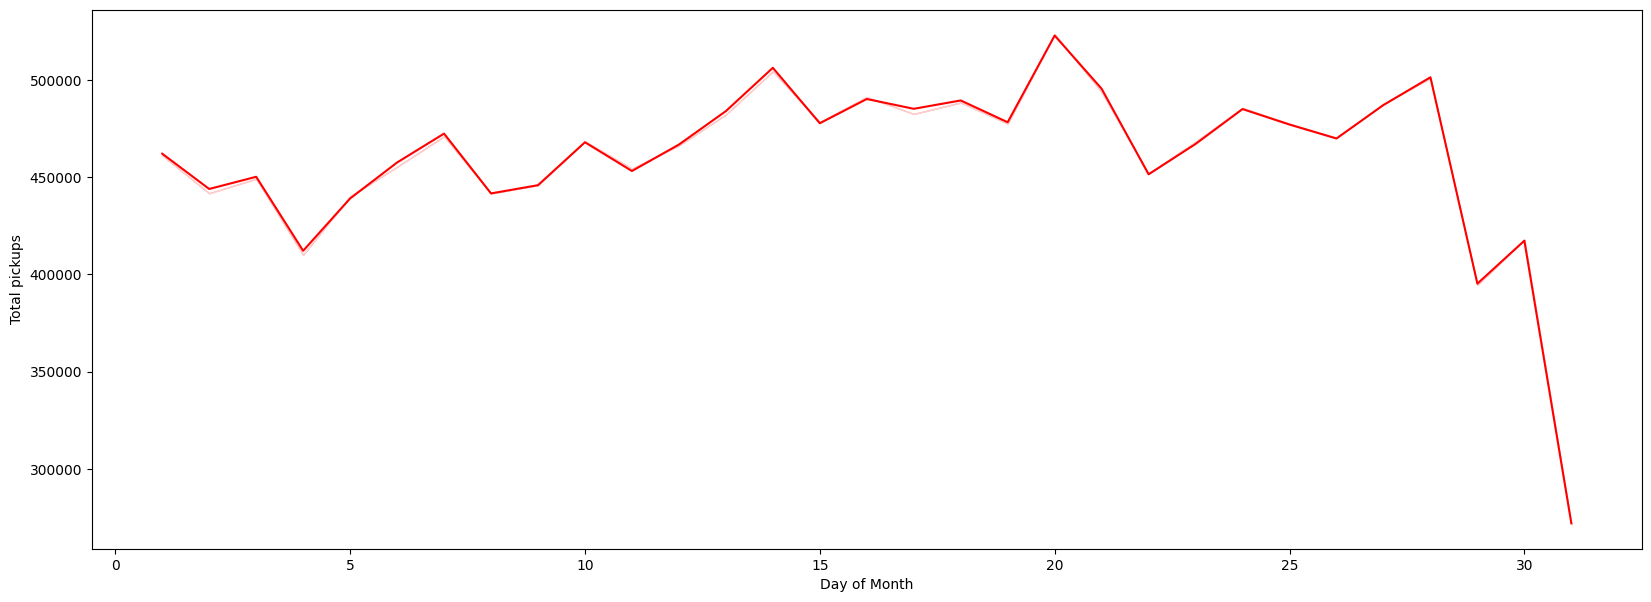

In [68]:
plt.figure(figsize = (20, 7))
sns.lineplot(x = "day", y = "pickups", estimator = 'sum', errorbar=('ci', 0), data = df, color = "RED")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

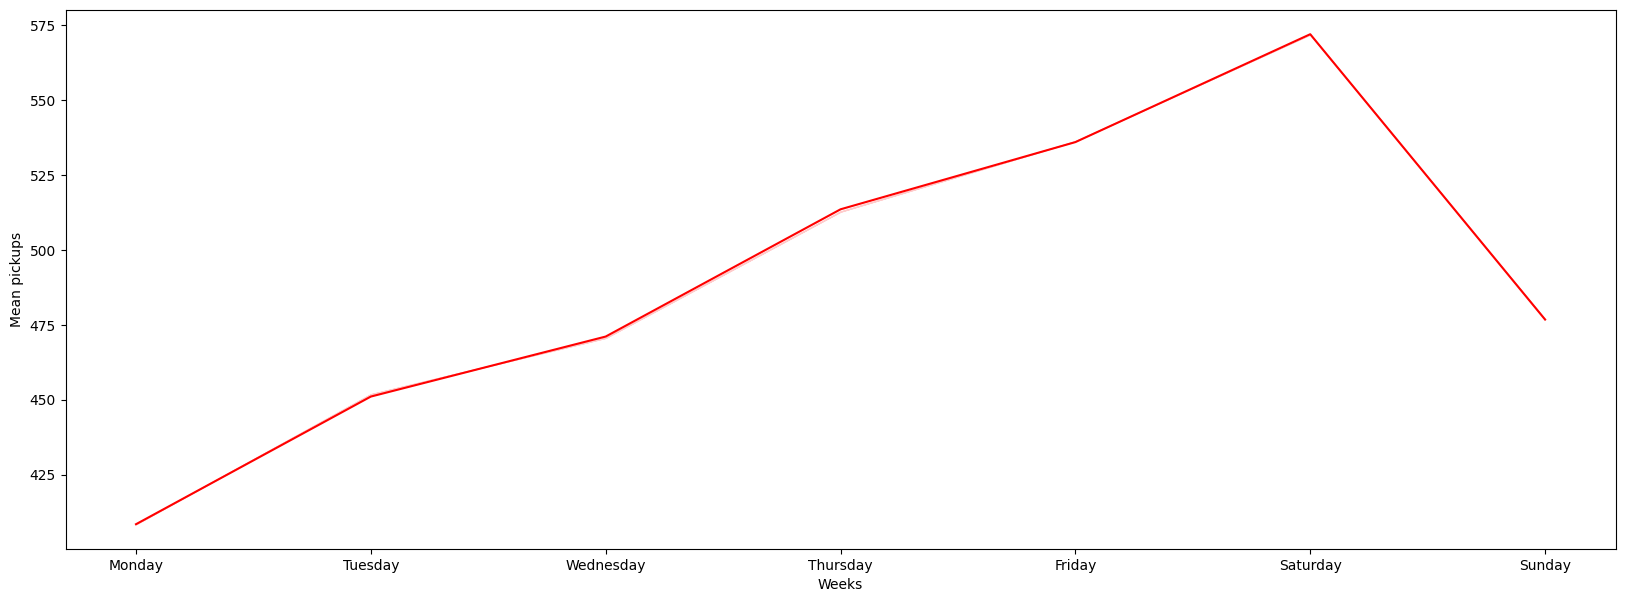

In [72]:
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df.week_day = pd.Categorical(df.week_day, ordered = True, categories = cats)
plt.figure(figsize = (20, 7))
sns.lineplot(x = "week_day", y = "pickups", errorbar=('ci', 0), data = df, color = "RED")
plt.ylabel('Mean pickups')
plt.xlabel('Weeks')
plt.show()

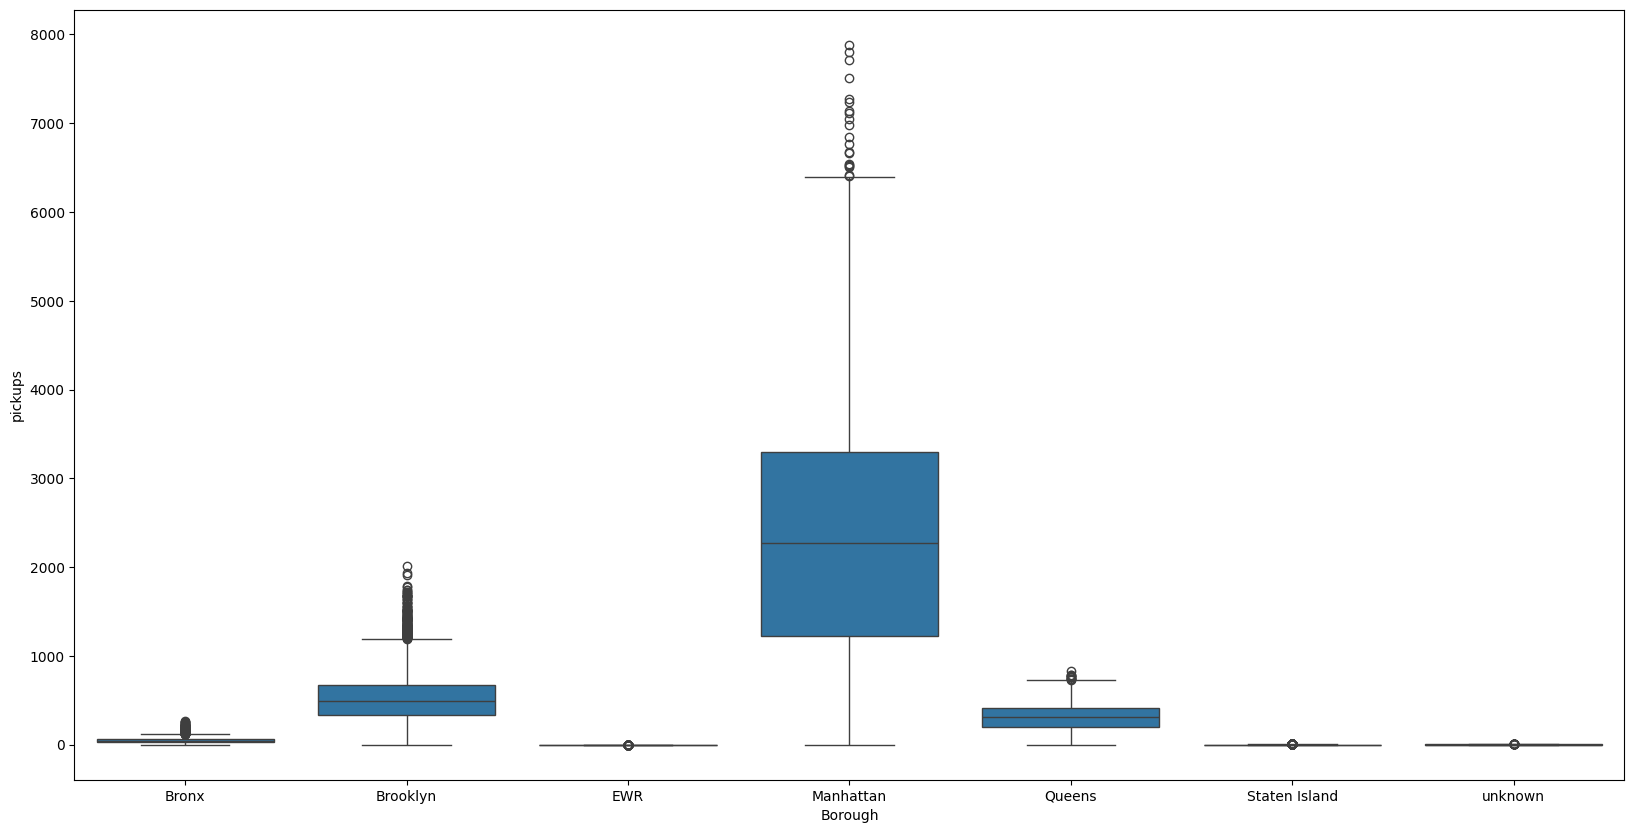

In [73]:
plt.figure(figsize = (20, 10))  
sns.boxplot(x='borough', y='pickups', data=df)
plt.ylabel('pickups')
plt.xlabel('Borough')
plt.show()

In [75]:
df.groupby('hday')['pickups'].mean()

C:\Users\jesse\AppData\Local\Temp\ipykernel_852\1373848248.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('hday')['pickups'].mean()


hday
N    492.339957
Y    437.199822
Name: pickups, dtype: float64

In [76]:
df.groupby(by=['borough', 'hday'])['pickups'].mean()

C:\Users\jesse\AppData\Local\Temp\ipykernel_852\3822388300.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by=['borough', 'hday'])['pickups'].mean()


borough        hday
Bronx          N         50.771073
               Y         48.065868
Brooklyn       N        534.727969
               Y        527.011976
EWR            N          0.023467
               Y          0.041916
Manhattan      N       2401.302921
               Y       2035.928144
Queens         N        308.899904
               Y        320.730539
Staten Island  N          1.606082
               Y          1.497006
unknown        N          2.057456
               Y          2.050420
Name: pickups, dtype: float64

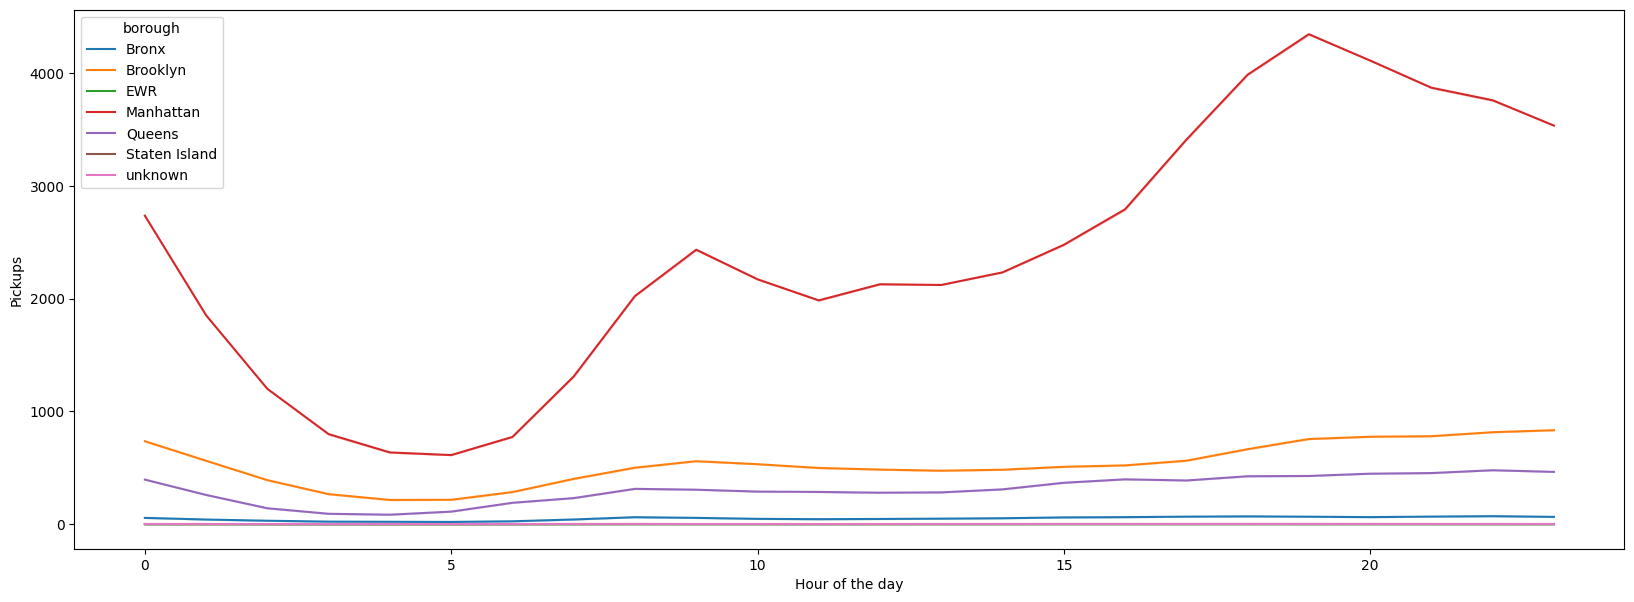

In [79]:
plt.figure(figsize = (20, 7))
sns.lineplot(x = "hour", y = "pickups", errorbar=('ci', 0), data = df, hue = 'borough')
plt.ylabel('Pickups')
plt.xlabel('Hour of the day')
plt.show()

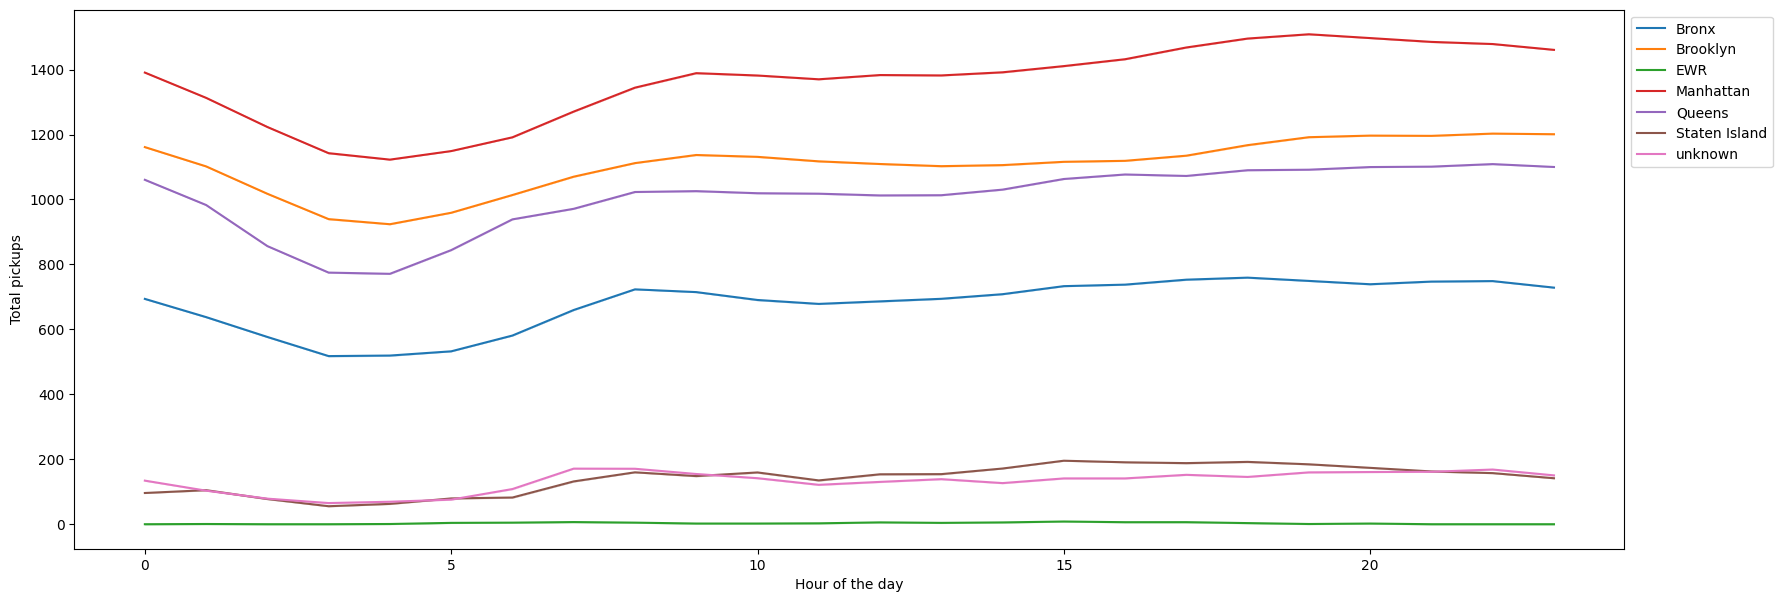

In [82]:
plt.figure(figsize = (20, 7))
sns.lineplot(x = df.hour, y = np.log1p(df.pickups), estimator ='sum', errorbar=('ci', 0), hue = df.borough)
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

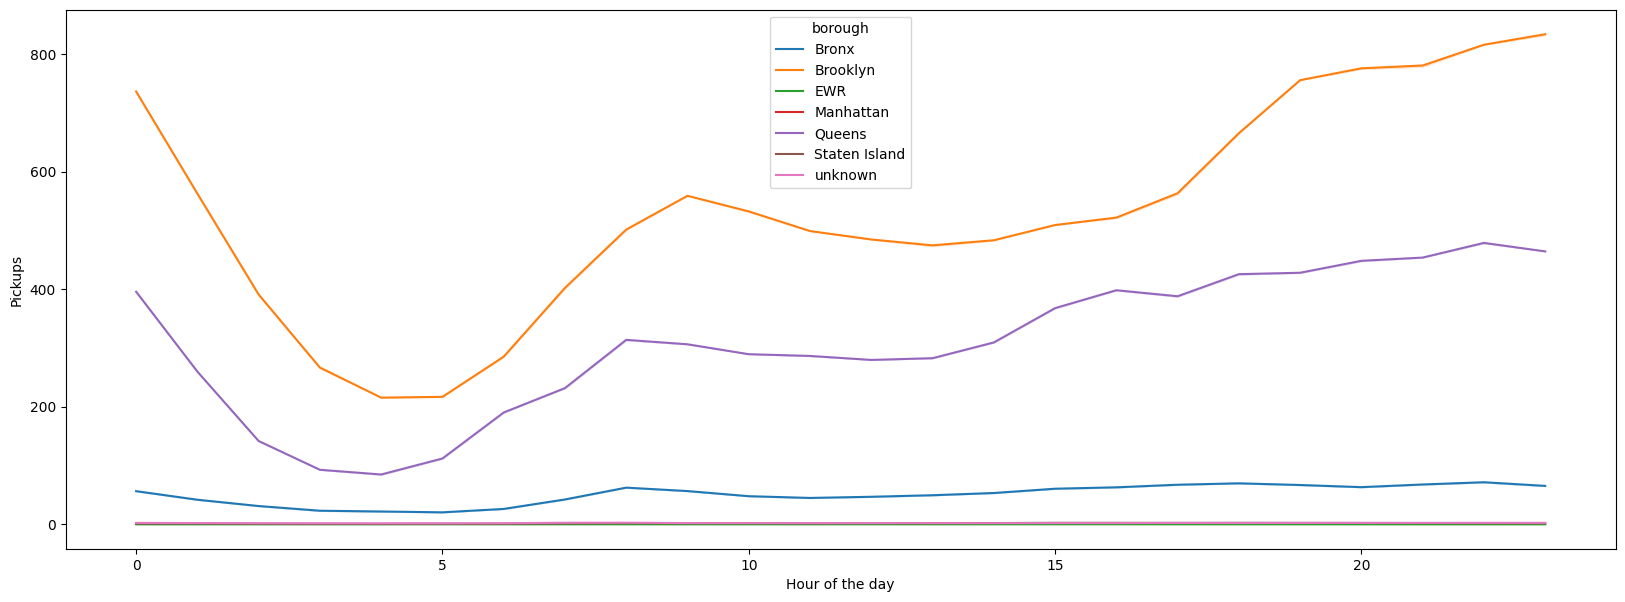

In [80]:
no_m = df[df['borough'] != 'Manhattan']
plt.figure(figsize = (20, 7))
sns.lineplot(x = "hour", y = "pickups", errorbar=('ci', 0), data = no_m, hue = 'borough')
plt.ylabel('Pickups')
plt.xlabel('Hour of the day')
plt.show()

C:\Users\jesse\AppData\Local\Temp\ipykernel_852\3975764914.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hm = df_man.pivot_table(index = 'hour', columns = 'week_day', values = 'pickups')


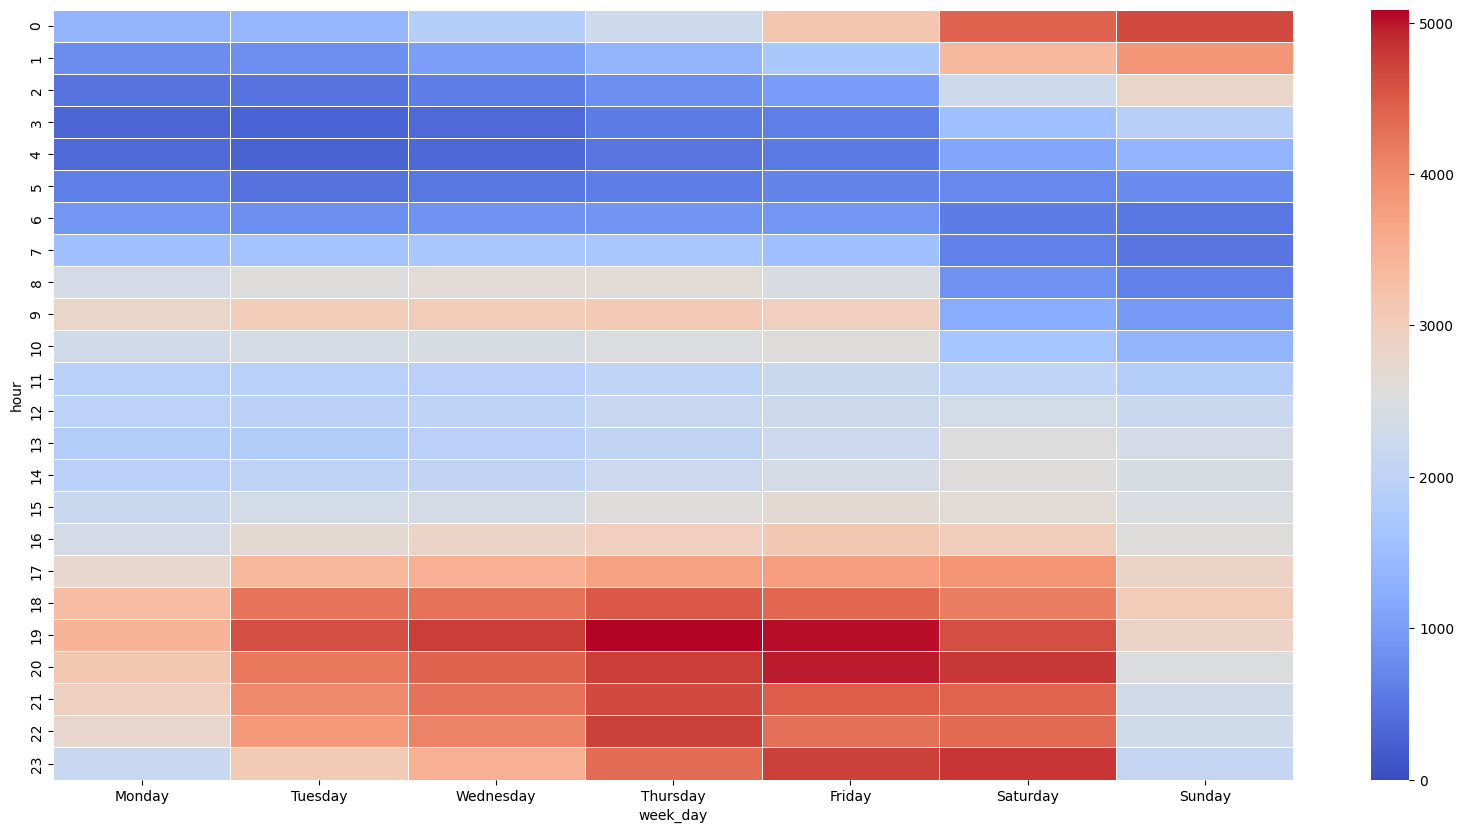

In [83]:
df_man = df[df.borough == 'Manhattan']
df_hm = df_man.pivot_table(index = 'hour', columns = 'week_day', values = 'pickups')

# Draw a heatmap
plt.figure(figsize = (20, 10)) # To resize the plot
sns.heatmap(df_hm,  fmt = "d", cmap = 'coolwarm', linewidths = .5, vmin = 0)
plt.show()